In [1]:
import pandas as pd
import numpy as np
from random import gauss
from pandas.plotting import autocorrelation_plot
import warnings
import itertools
from random import random

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# import matplotlib as mpl
import seaborn as sns    

In [4]:
# general settings
class CFG:
    data_folder = '/tf/notebooks/time_series/'
    img_dim1 = 20
    img_dim2 = 10
    
    
# adjust the parameters for displayed figures    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})  

<Axes: xlabel='date'>

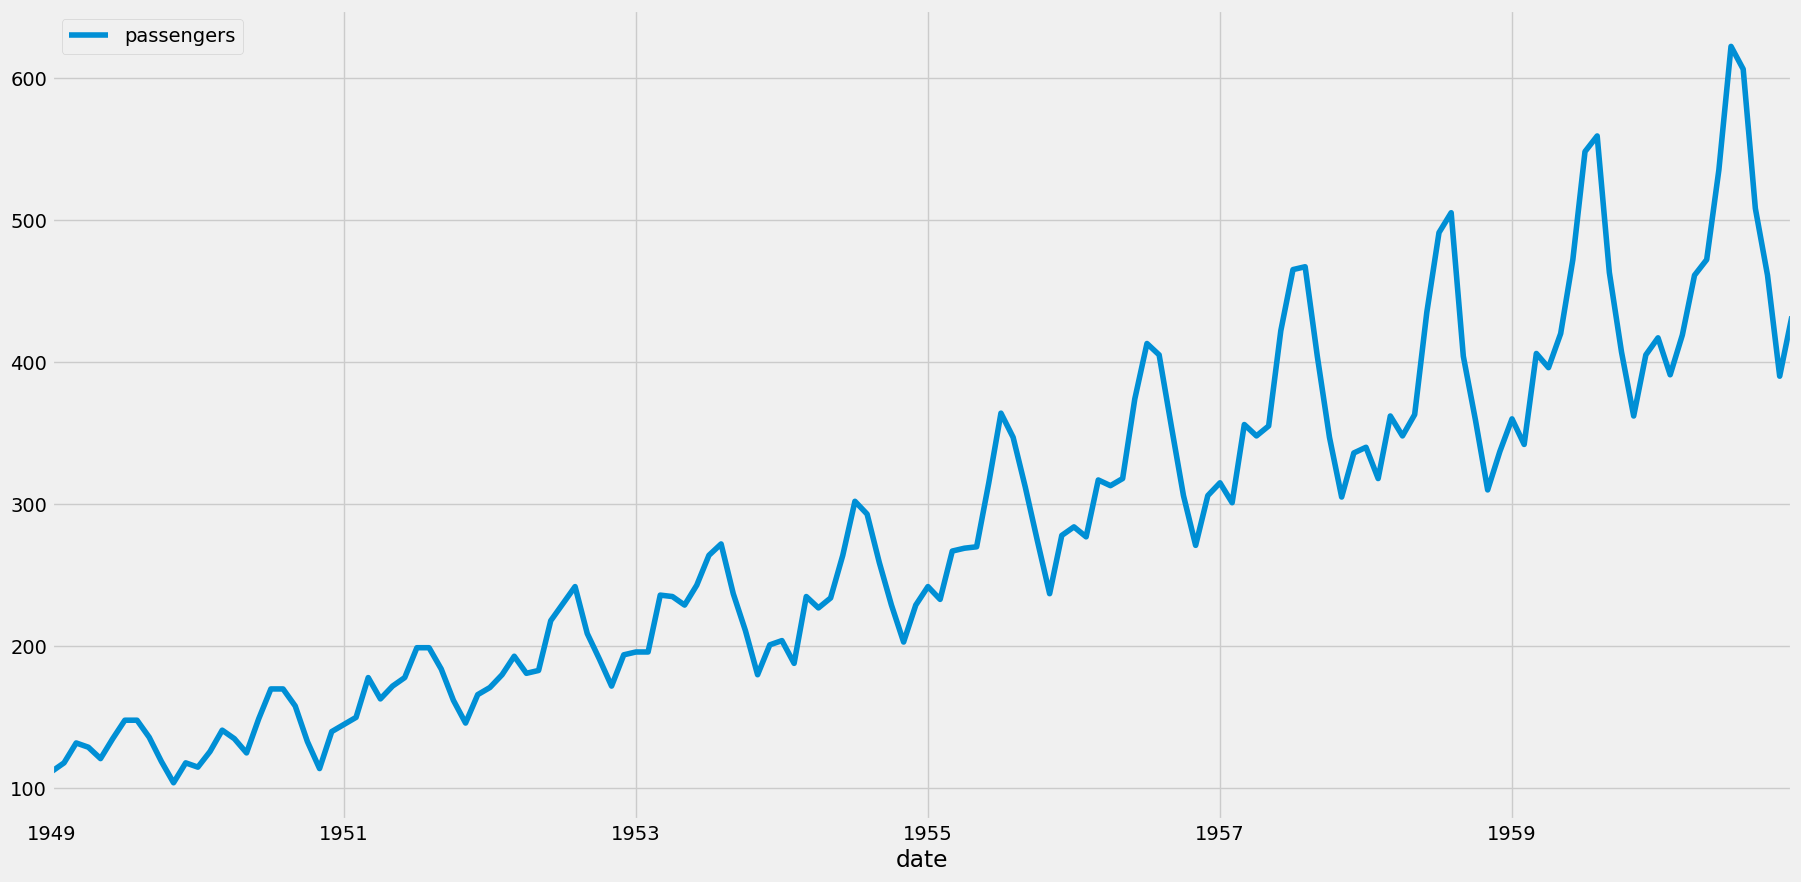

In [5]:
series = pd.read_csv(CFG.data_folder + 'passengers.csv')
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot()

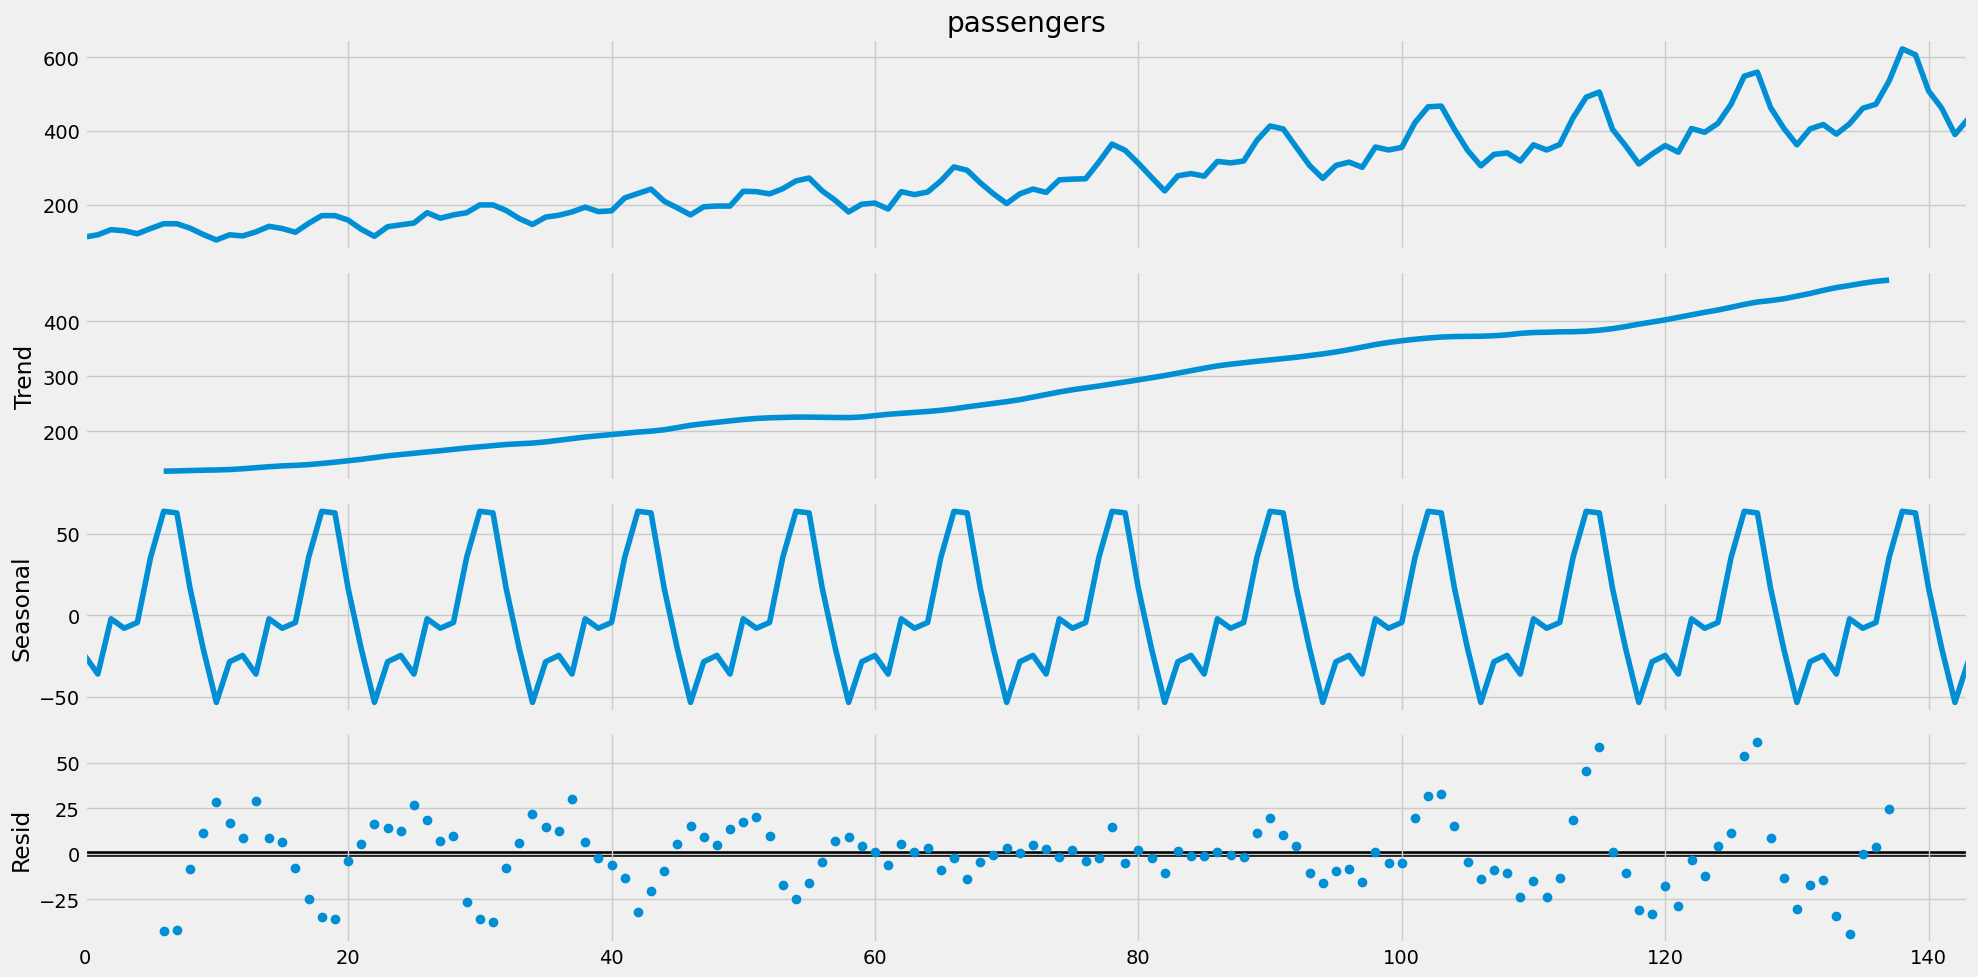

In [6]:
# decomposition
decomposition = sm.tsa.seasonal_decompose(series["passengers"],period =12) 
figure = decomposition.plot()
plt.show()

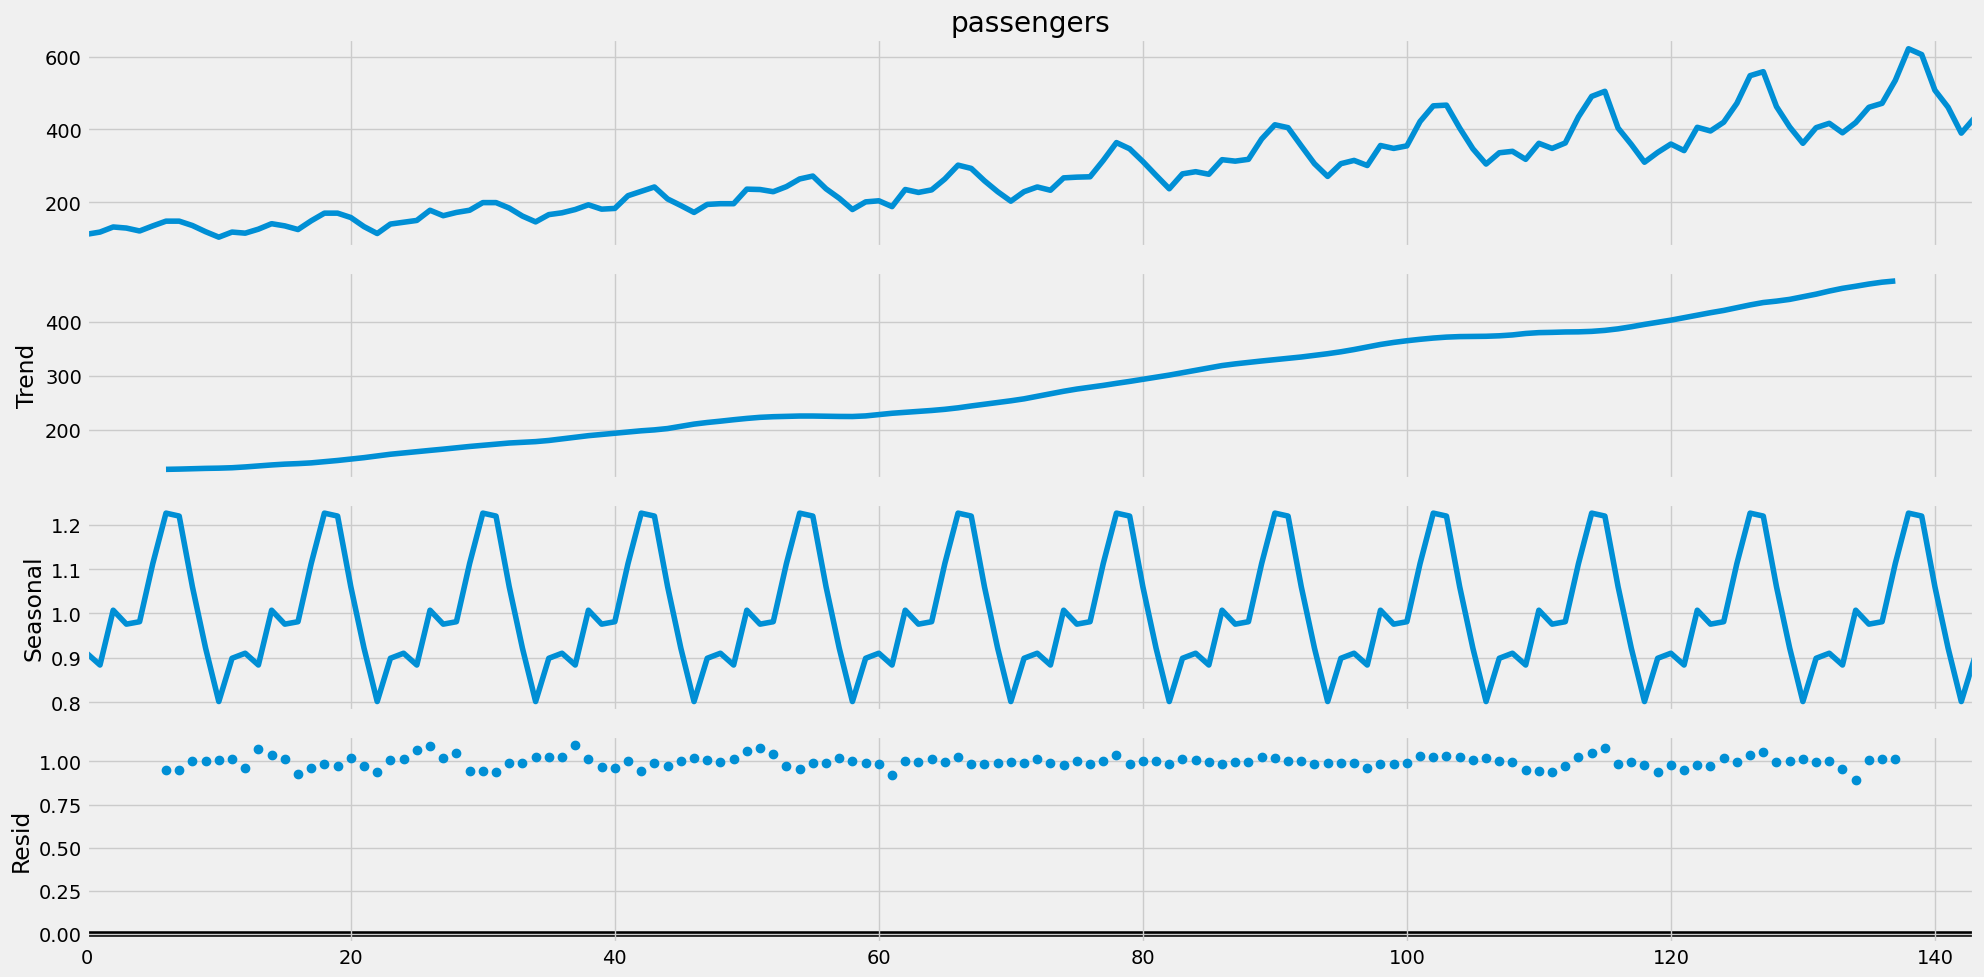

In [7]:
decomposition = sm.tsa.seasonal_decompose(series["passengers"],period =12, model = 'multiplicative') 
figure = decomposition.plot()
plt.show()

# Dependence
### Mean = E(x)
### Covariance = COV(x1,x2)
### Autocorelation ACF
### Partial Autocorelation PACF

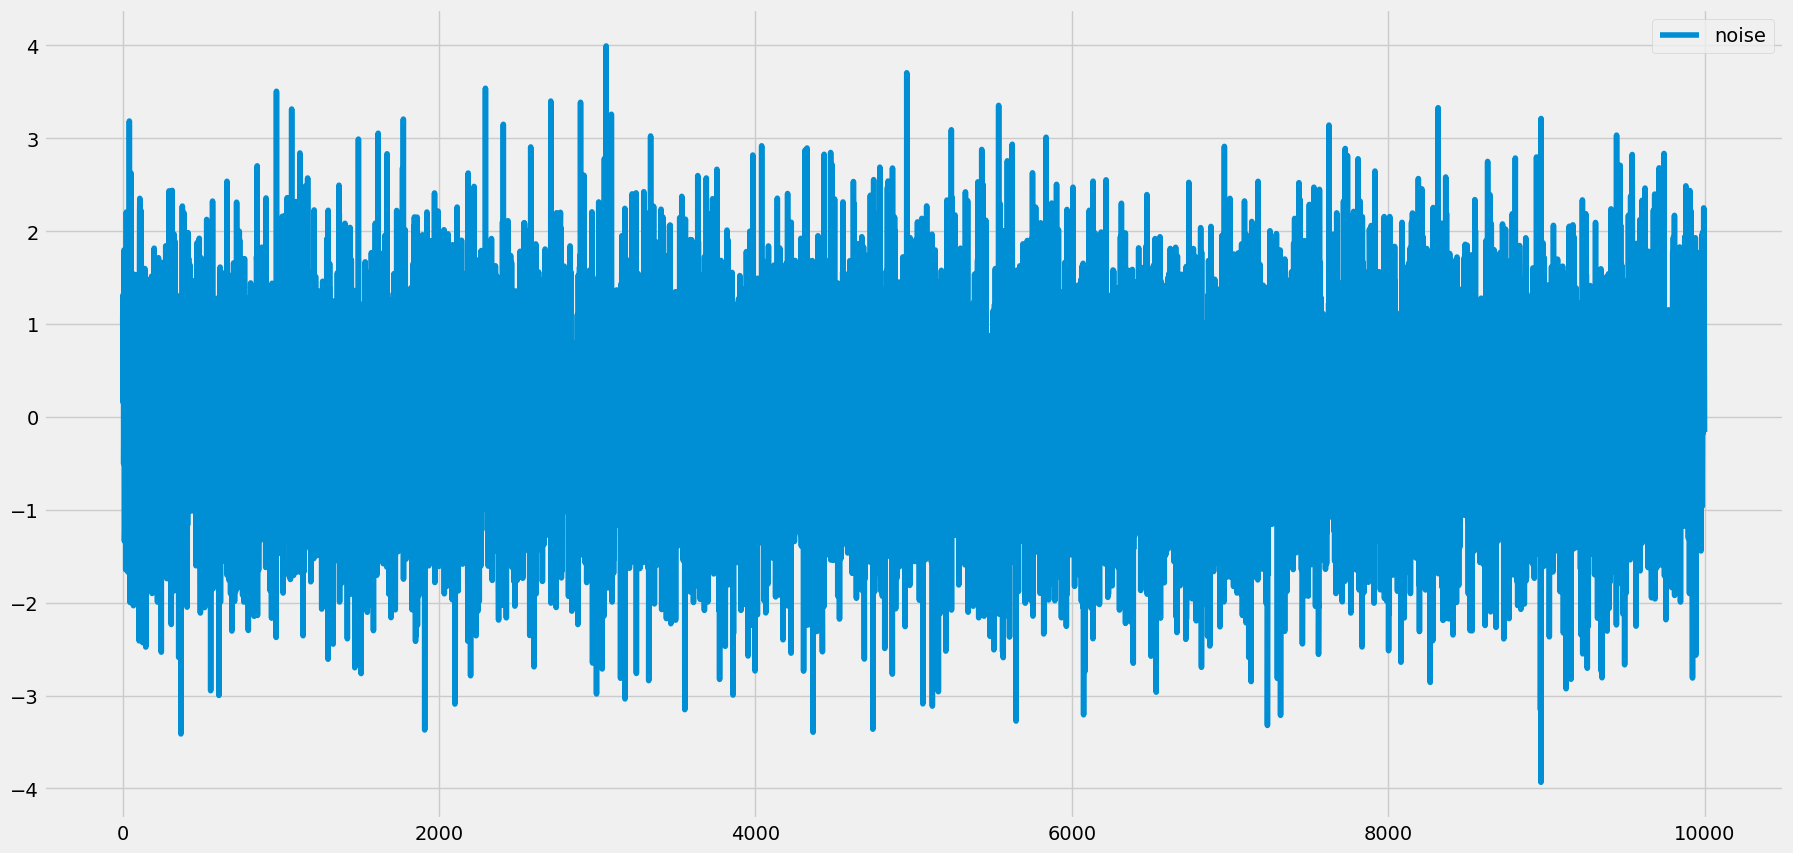

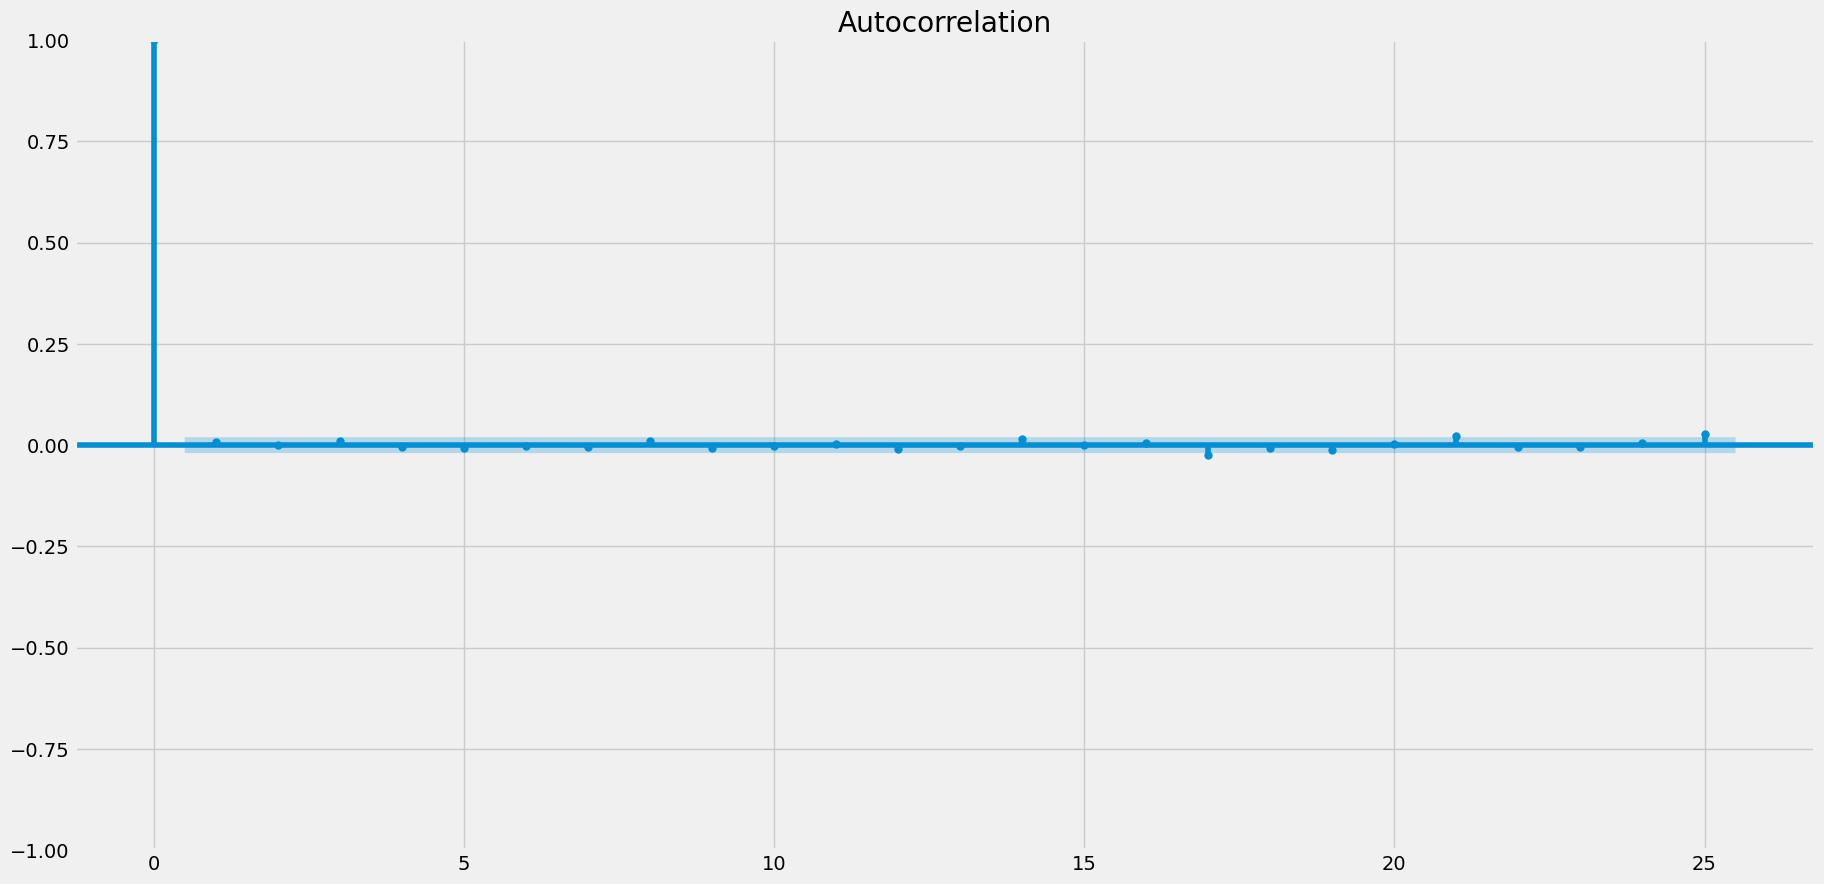

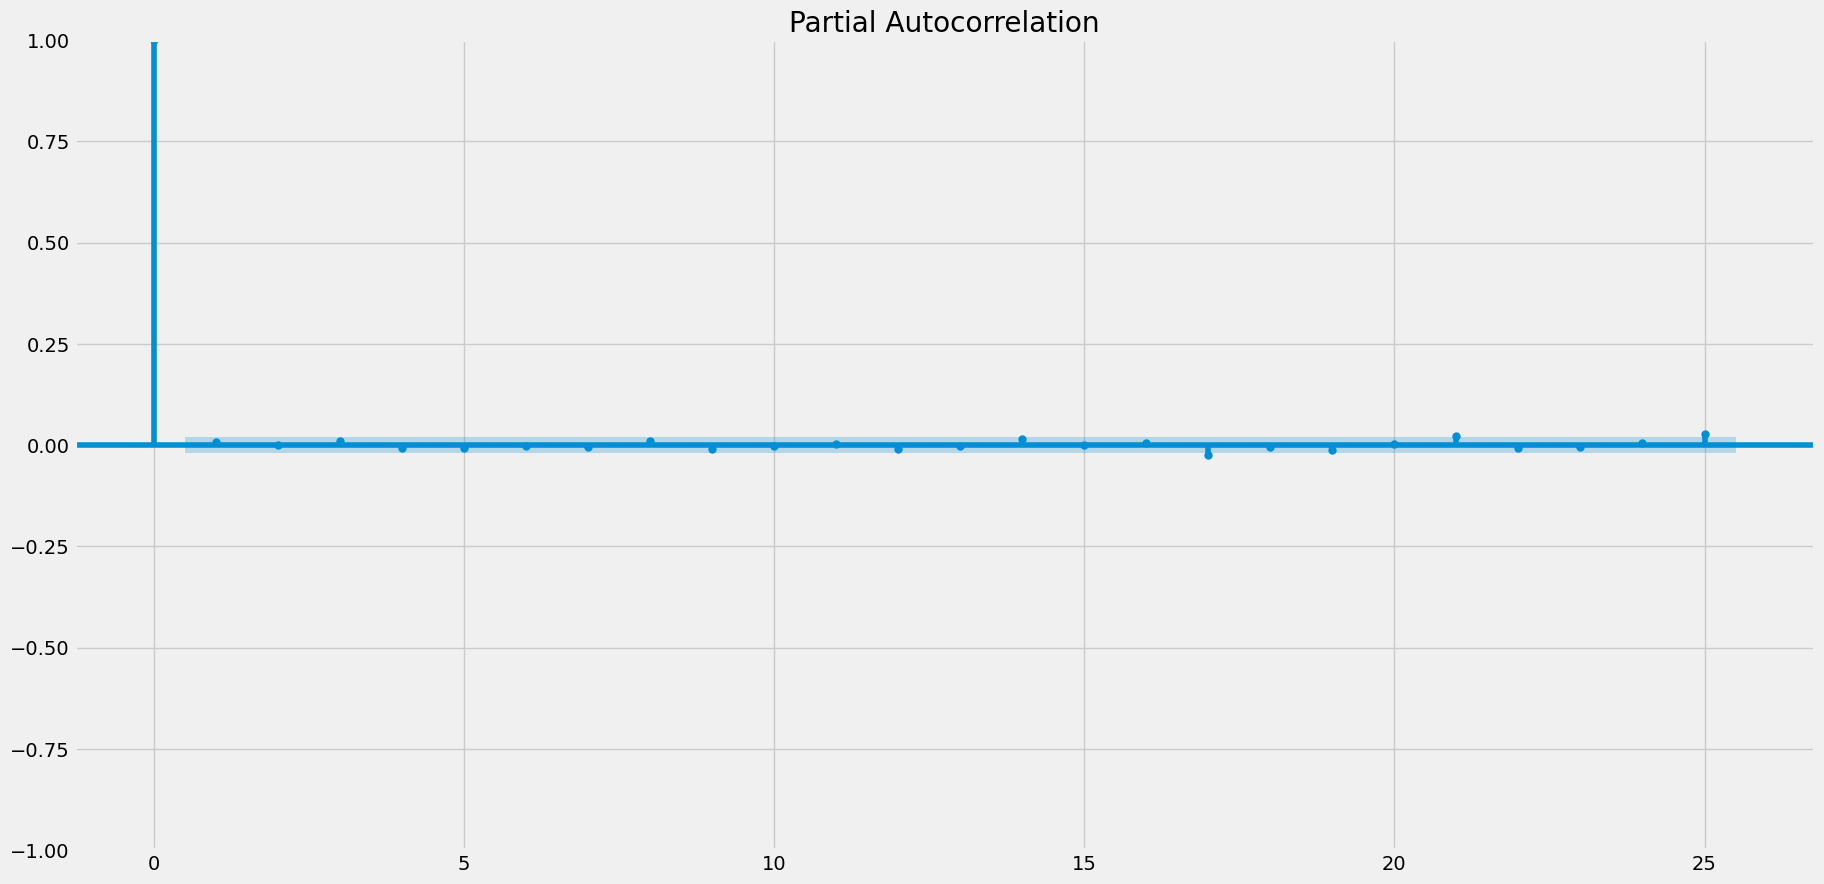

In [9]:
xseries = pd.DataFrame(data = np.random.normal(0, 1, 10000), columns = ['noise'] )
xseries.plot()
print()

plot_acf(xseries['noise'], lags = 25)
print()

plot_pacf(xseries['noise'], lags = 25)
print()

# Tests for stationarity

### Augmented Dickey-Fuller (ADF))
### Kwiatkowski–Phillips–Schmidt–Shin (KPSS)
### Philips-Perron (PP)


mean:
chunk1: 182.90 vs chunk2: 377.69
variance:
chunk1: 2244.09 vs chunk2: 7367.96


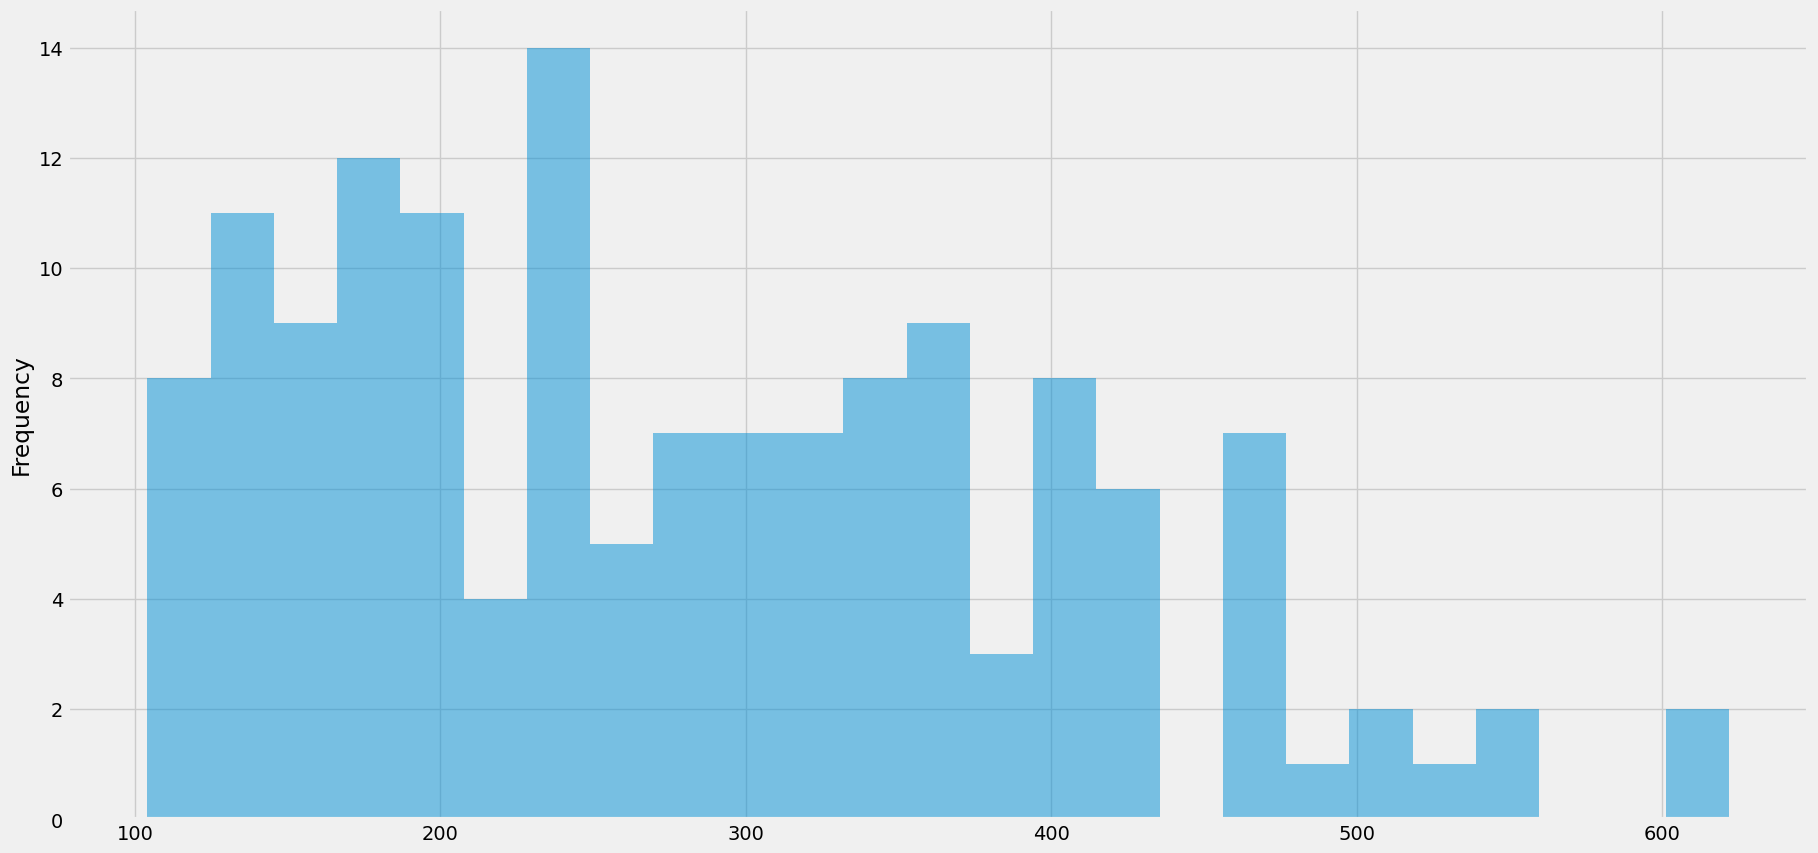

In [11]:
series = pd.read_csv(CFG.data_folder + 'passengers.csv')
series['date'] = pd.to_datetime(series['date'])
# series.set_index('date').plot()

series['passengers'].plot.hist(bins=25, alpha=0.5)

X = series.passengers.values
split =  int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean:')
print('chunk1: %.2f vs chunk2: %.2f' % (mean1, mean2))
print('variance:')
print('chunk1: %.2f vs chunk2: %.2f' % (var1, var2))

In [12]:
decomposition = seasonal_decompose(X, model='additive', period =12)

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [13]:
result = adfuller(decomposition.trend[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.025948
p-value: 0.994532


In [14]:
result = adfuller(decomposition.seasonal[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6647672721206068.000000
p-value: 0.000000


In [15]:
result = adfuller(decomposition.resid[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.029170
p-value: 0.000019


# Transformation

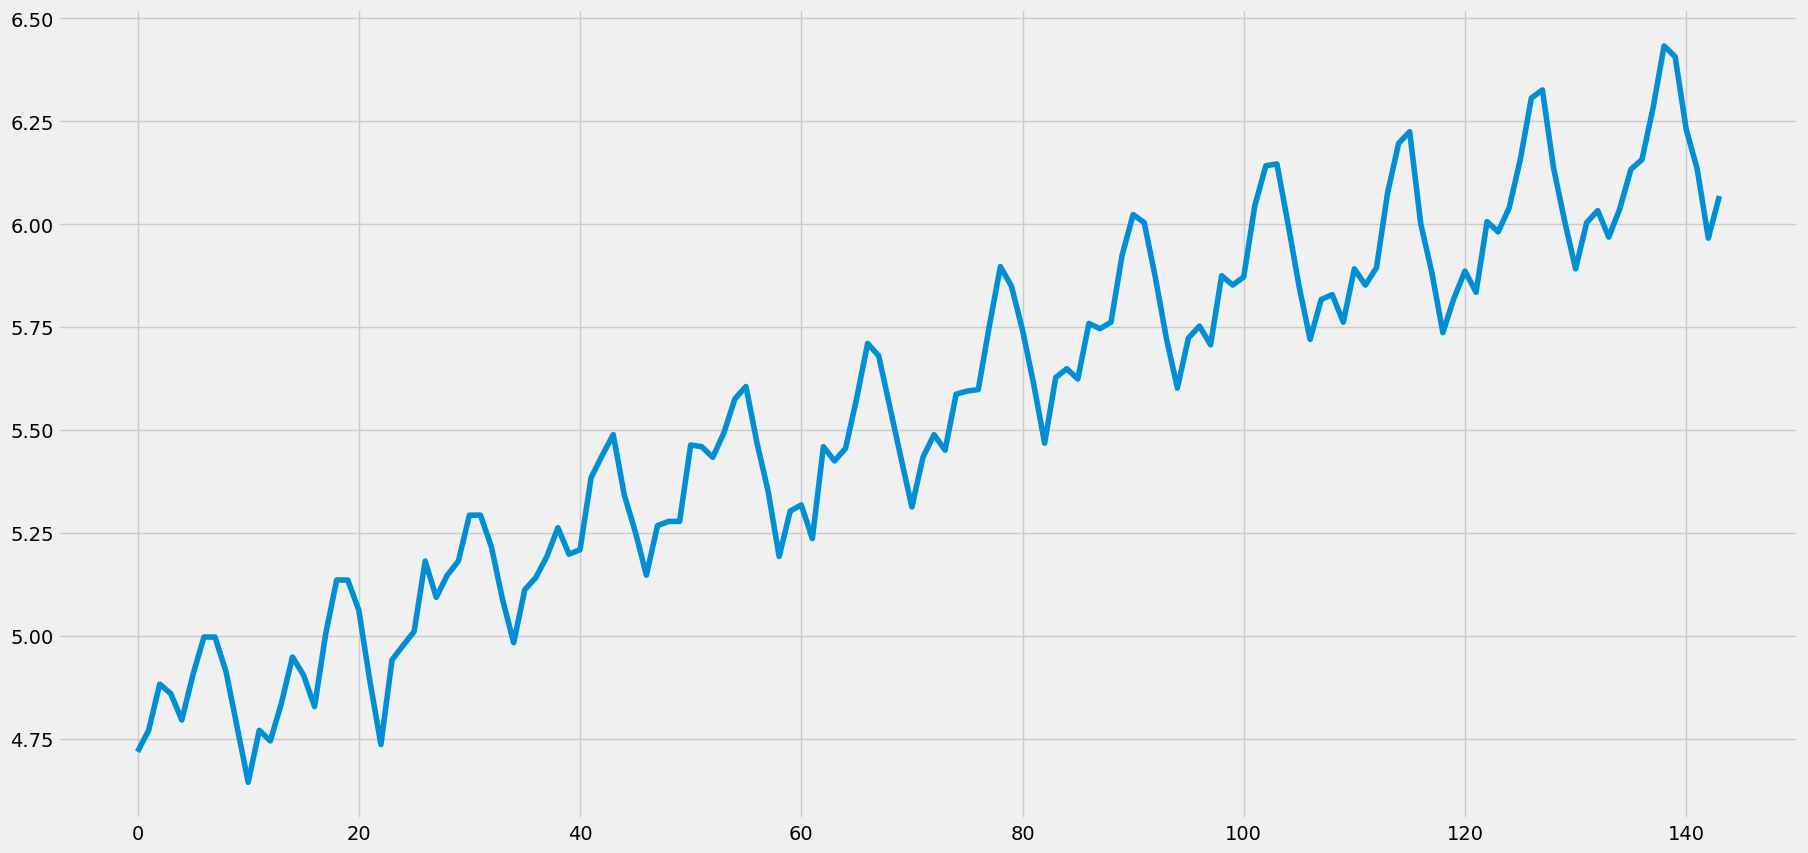

p-value: 0.422367


In [16]:
series['passengers2'] = np.log(series['passengers'])
series.passengers2.plot()
plt.show()

result = adfuller(series.passengers2)
print('p-value: %f' % result[1])

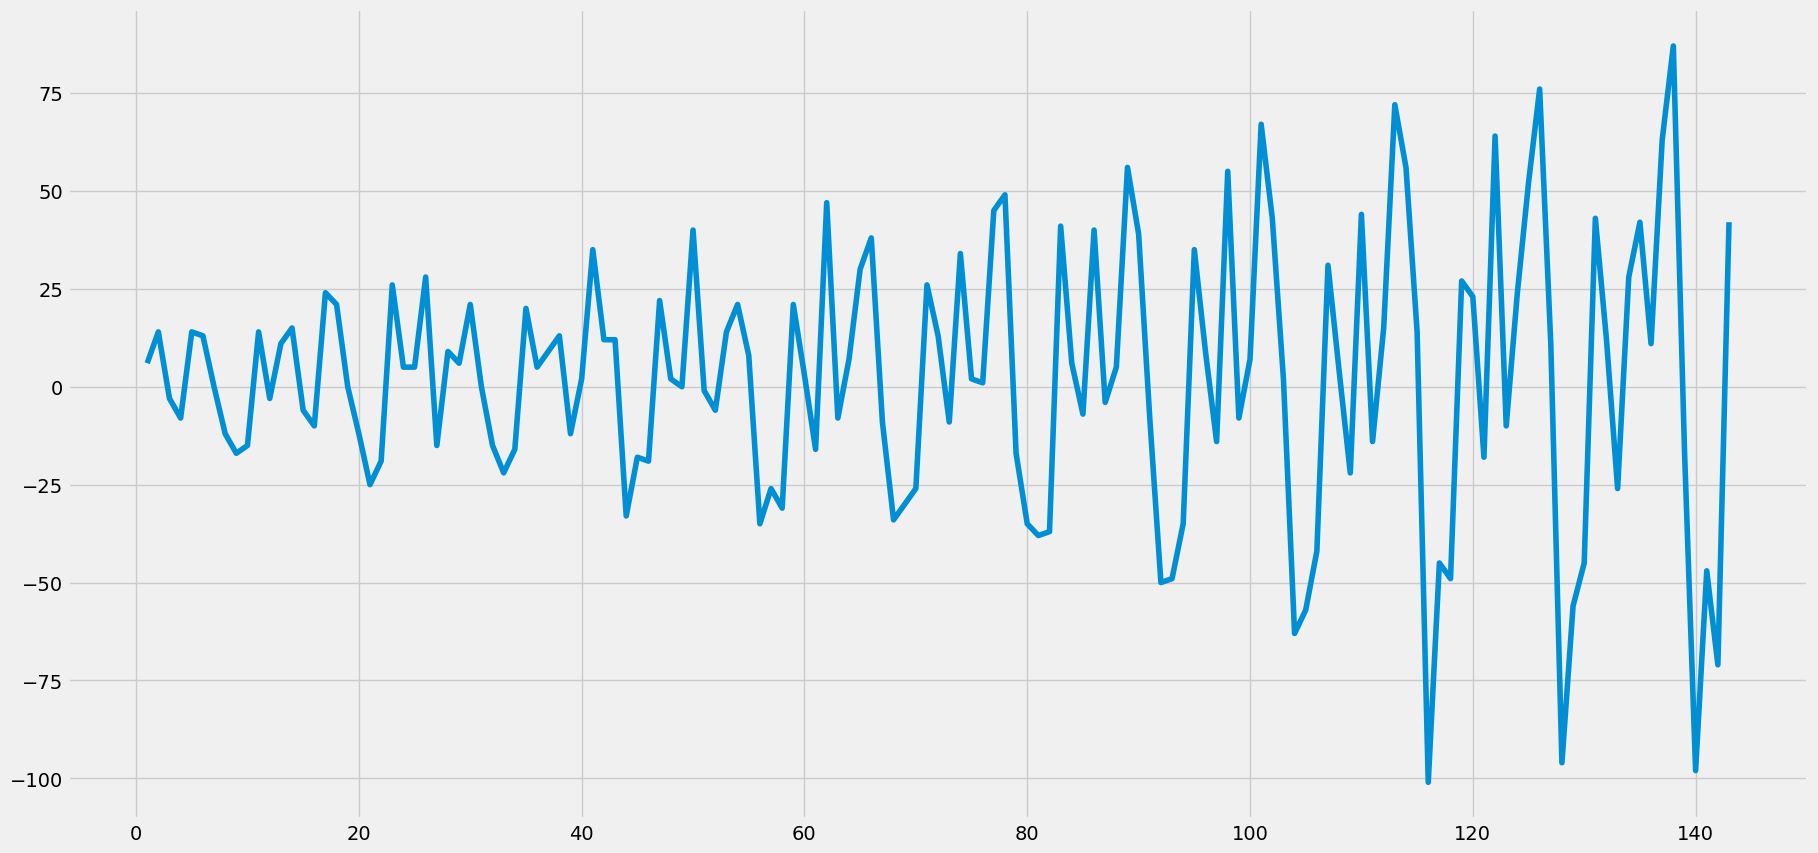

In [17]:
series['passengers3'] = series['passengers'].diff()
series.passengers3.plot()
plt.show()

In [18]:
result = adfuller(series.passengers3[10:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.830154
p-value: 0.054094


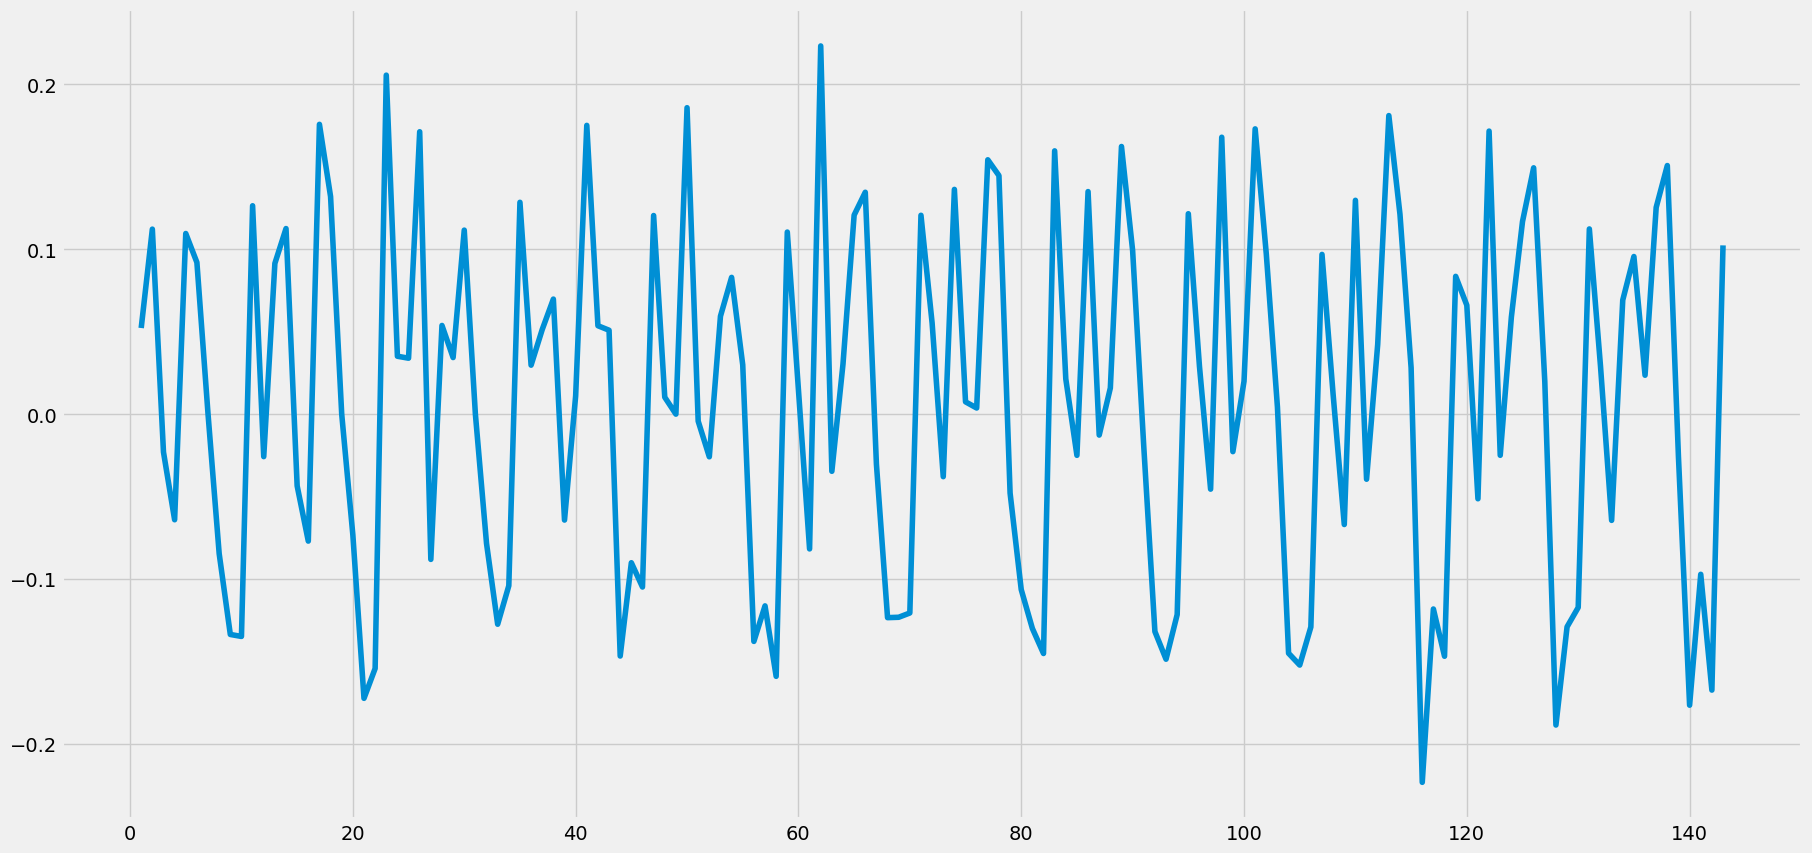

ADF Statistic: -3.086110
p-value: 0.027598


In [19]:
series['passengers4'] = series['passengers'].apply(np.log).diff()
series.passengers4.plot()
plt.show()

result = adfuller(series.passengers4[10:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

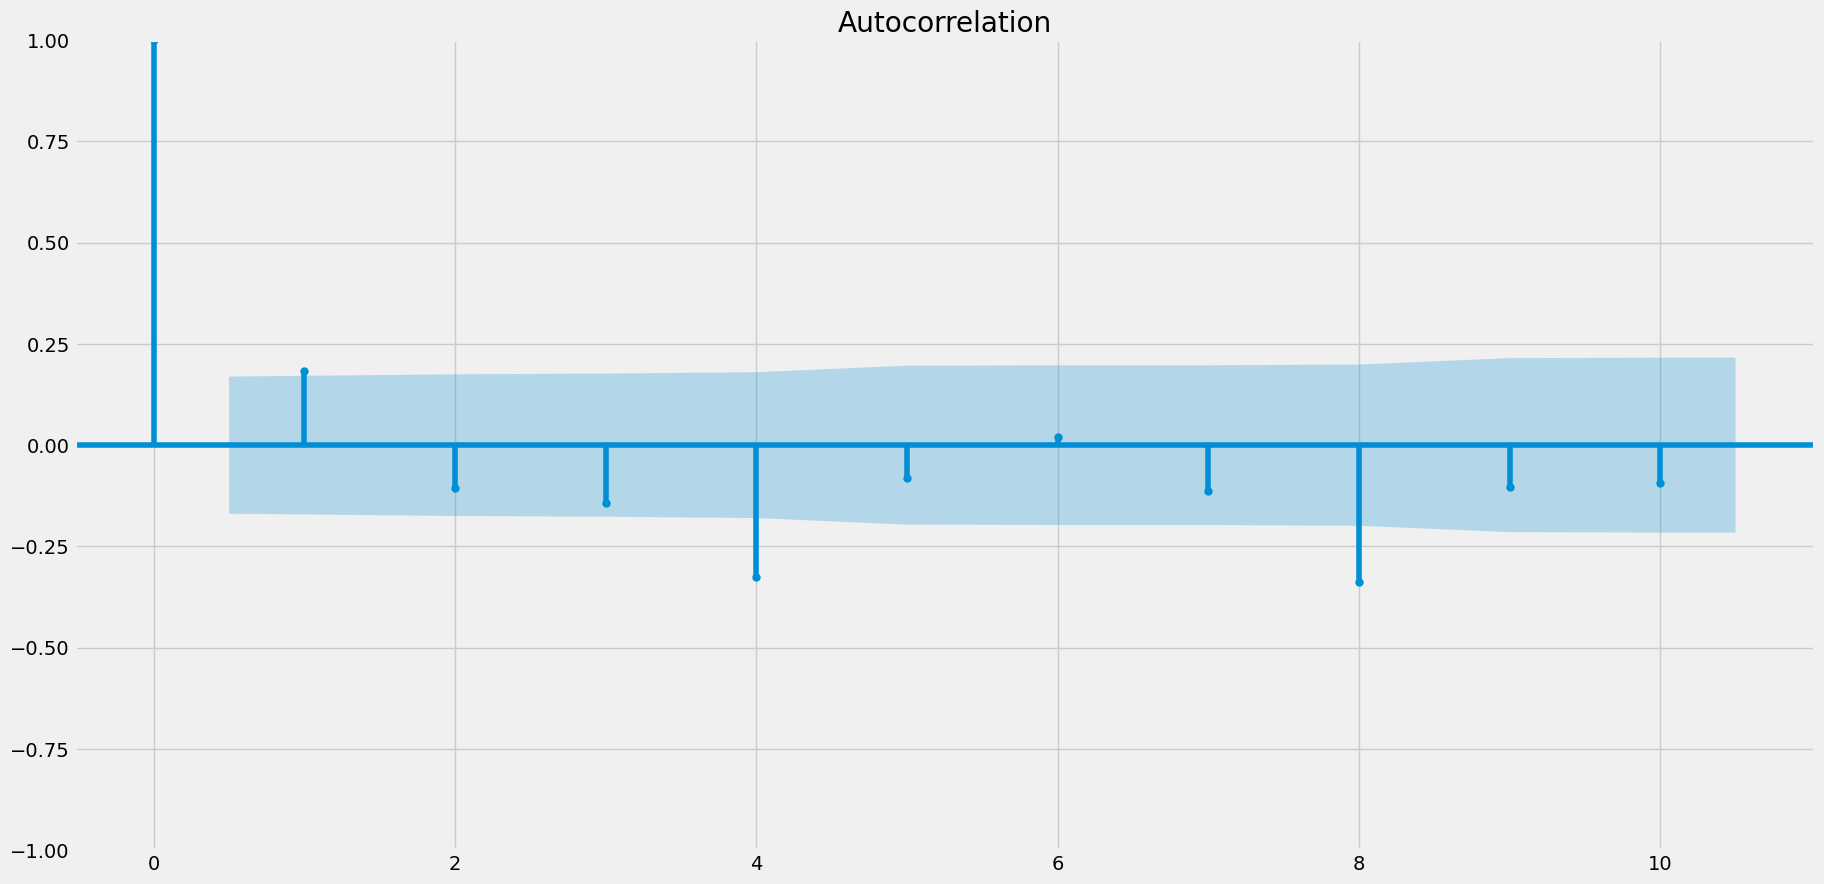

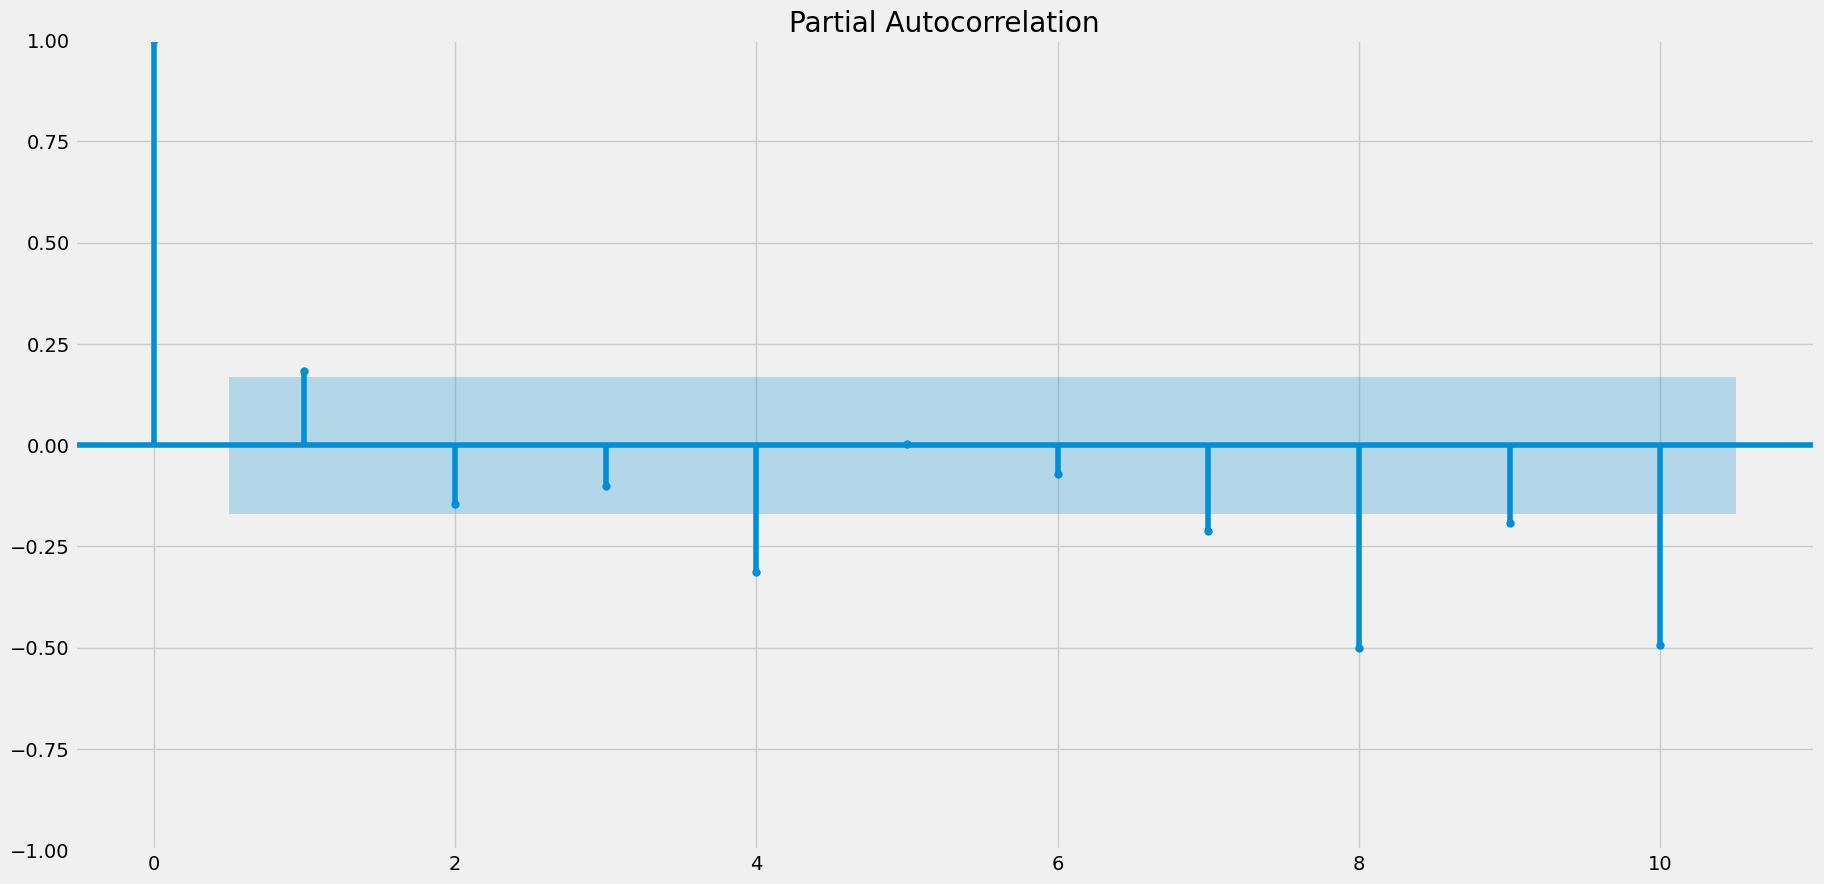

In [20]:
plot_acf(series['passengers4'][10:], lags = 10)
plt.show()

plot_pacf(series['passengers4'][10:], lags = 10)
plt.show()